<a href="https://colab.research.google.com/github/Mhna1234/projects-and-home-works/blob/main/Tree_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OrdinalEncoder ,OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer



Tree Survival Prediction - Mhna Massalha

In [ ]:

data = pd.read_csv("/content/Tree_Data.csv")





In [ ]:
data.info()
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [ ]:
data.nunique()

,0
No,2783
Plot,18
Subplot,5
Species,4
Light_ISF,53
Light_Cat,3
Core,2
Soil,7
Adult,36
Sterile,2


In [ ]:
data.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [ ]:

data.dtypes

,0
No,int64
Plot,int64
Subplot,object
Species,object
Light_ISF,float64
Light_Cat,object
Core,int64
Soil,object
Adult,object
Sterile,object


In [ ]:


data.isna().sum()


,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Adult,0
Sterile,0


In [ ]:

data.describe()

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,2253.515063,5.203659,0.025638,0.477387,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.50000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


In [ ]:





data['Alive'] = (data['Alive'] == 'X').astype(int)
y = data['Alive']

cat=[ ['Low','Med', 'High']]
Light_cat_e =OrdinalEncoder(categories=cat)
data['Light_Cat'] = Light_cat_e.fit_transform(data[['Light_Cat']])

data.drop(['No', 'EMF','Census', 'Time', 'Event', 'Harvest', 'Alive'], axis=1, inplace=True)


data.dropna(axis=0 ,how='any',inplace=True)


categorical_nominal = ['Species', 'Subplot', 'Soil', 'Conspecific','Core']

categorical_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    if col not in categorical_nominal:
        data[col] = le.fit_transform(data[col].astype(str))

ct = ColumnTransformer(
        transformers=[
                ('encoder', OneHotEncoder(), categorical_nominal)
            ],
        remainder='passthrough'
    )
data = ct.fit_transform(data)


scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)





In [ ]:

ann= tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= ann.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))










Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4641 - loss: 0.7702 - val_accuracy: 0.7989 - val_loss: 0.4684
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7975 - loss: 0.4438 - val_accuracy: 0.8366 - val_loss: 0.3627
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8263 - loss: 0.3720 - val_accuracy: 0.8330 - val_loss: 0.3393
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.3506 - val_accuracy: 0.8294 - val_loss: 0.3321
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8226 - loss: 0.3359 - val_accuracy: 0.8312 - val_loss: 0.3284
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8302 - loss: 0.3295 - val_accuracy: 0.8384 - val_loss: 0.3256
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8299 - loss: 0.3305 - val_accuracy: 0.8348 - val_loss: 0.3241
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8233 - loss: 0.3292 - val_accuracy: 0.8366 - 

In [ ]:

# Predict and round probabilities
y_pred_probs = ann.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))







18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[419  46]
 [ 44  48]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       465
           1       0.51      0.52      0.52        92

    accuracy                           0.84       557
   macro avg       0.71      0.71      0.71       557
weighted avg       0.84      0.84      0.84       557



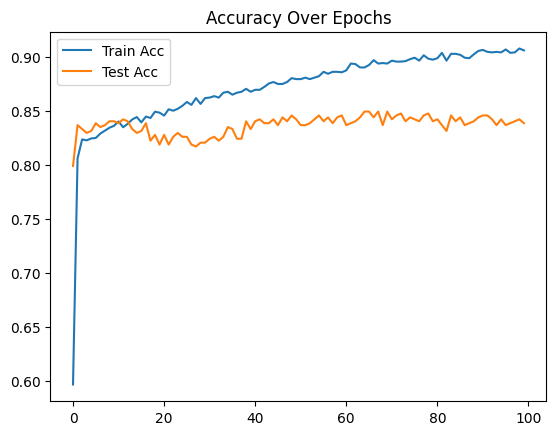

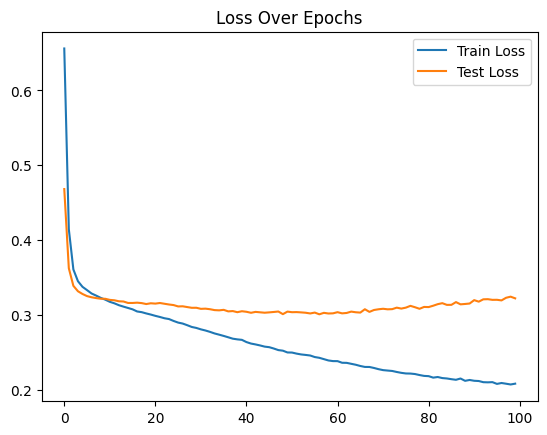

In [ ]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()












